##**Airline Passenger Referral Prediction**

aeroplane.avif

##**Problem Statement**

Data includes airline reviews from 2006 to 2019 for popular airlines around the world withmultiple choice and free text questions. Data is scraped in Spring 2019. The main objectiveis to predict whether passengers will refer the airline to their friends.

##**Project Summary**
In this project ,we shall be doing analysis to find whether a passengeer will recommend the airline to their friend.We shall be going through data and rating given  by passenger on various aspects of service like,seatcomfort,cabin service,ground service, value for money and other.

We shall  start our project by importing important libraries.Once done we shall start cleaning our data.We shall dropping certain columns and deleting some duplicate rows too. Then we shall use graphical or non graphical method for EDA before handling null values,because the count of null value is high so we shall have to drop them.We shall draw certain conclusion on the basis of it.Once we have drawn our conclusion we shall be handling null values and imputing them as required.

We shall be using heatmaps to find correlations bteween variable and then drawing some conclusions on that basis. We shall  we removing multicollineraty.

Once done we shall be splitting our data in dependable variables(Y) and independentable variables(X). Then our data into test and train data.

We shall be implementing following models:
* **Logistic Regression**:What is meant by logistic regression?
Logistic regression is a data analysis technique that uses mathematics to find the relationships between two data factors. It then uses this relationship to predict the value of one of those factors based on the other. The prediction usually has a finite number of outcomes, like yes or no.
Once done I had used *Confusion Matrix* and then impelmenting cross validation

* **Decision Tree**:
A decision tree algorithm is a machine learning algorithm that uses a decision tree to make predictions. It follows a tree-like model of decisions and their possible consequences. The algorithm works by recursively splitting the data into subsets based on the most significant feature at each node of the tree.
Then HYPERPARAMETER TUNING is done.

* **Random Forest**:The random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output. The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.After implementing Random Forest cross validation is done.

* **K-nearest Neighbour**:A k-nearest-neighbor algorithm, often abbreviated k-nn, is an approach to data classification that estimates how likely a data point is to be a member of one group or the other depending on what group the data points nearest to it are in.The k-nearest-neighbor is an example of a “lazy learner” algorithm, meaning that it does not build a model using the training set until a query of the data set is performed.

* **Support Vector Machine**:A support vector machine (SVM) is a type of deep learning algorithm that performs supervised learning for classification or regression of data groups.

* **Naive Bayes Classification**:The Naïve Bayes classifier is a supervised machine learning algorithm, which is used for classification tasks, like text classification. It is also part of a family of generative learning algorithms, meaning that it seeks to model the distribution of inputs of a given class or category.

Then I created the function to compare the scores.Thereafter conclusion has been drawn

##**GitHub Link**

https://github.com/Ujjwalnibber/AirlinePredictionproject

**Importing important libraries**

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


# Importing all models from sklearn to be used in our model building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
import time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.naive_bayes import MultinomialNB



# Importing  metrics for evaluation for our models
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import recall_score,f1_score,roc_curve, roc_auc_score

**Mounting the Drive**

In [ ]:
#importing the dataset from drive
from google.colab import drive
drive.mount('/content/drive')


**Reading CSV File and downloading the dataset**

In [132]:
df = "/content/drive/MyDrive/data_airline_reviews.xlsx"
df_airlines = pd.read_excel(df)

In [133]:
#Lets us see how our dataset looks like
#First five rows
df_airlines.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
#Last five rows
df_airlines.tail()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


##**Data descriptions:**

**airline**: Name of the airline.

**overall**: Overall point is given to the trip between 1 to 10.

**author**: Author of the trip

**reviewdate**: Date of the Review customer review: Review of the customers in free text format

**aircraft**: Type of the aircraft

**travellertype**: Type of traveler (e.g. business, leisure)

**cabin**: Cabin at the flight date flown: Flight date

**seatcomfort**: Rated between 1-5

**cabin service**: Rated between 1-5

**foodbev**: Rated between 1-5 entertainment: Rated between 1-5

**groundservice**: Rated between 1-5

**valueformoney**: Rated between 1-5

In [134]:
#Shape of our dataset
df_airlines.shape

(131895, 17)

Our data set contains 131895 rows and 17 columns.

In [135]:
df_airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

Our data set contains 131895 rows and 17 columns.

We also see NaN value through out dataset.

But we can also see that every odd number row is Nan and in lower half all even rows contain NaN value.


In [136]:
df_airline = df_airlines.copy()

In [137]:
# droping the rows which have all values as NaN
df_airline.dropna(how='all',inplace=True)
#Reset index of Dataframe.
df_airline.reset_index(drop= 'index', inplace = True)

In [138]:
df_airline.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
1,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
2,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
3,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
4,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no


In [139]:
df_airline.tail()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
65942,Ukraine International,NaN,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
65943,Ukraine International,NaN,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
65944,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
65945,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
65946,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


##**Delete duplicate rows**

In [140]:
#counting  number of duplicated values
df_airline.duplicated().sum()

4764

In [141]:
#since there are duplicate values we shall proceed further
df_airline.drop_duplicates(inplace = True)

In [142]:
df_airline.shape

(61183, 17)

In [143]:
df_airline.nunique().sort_values()

recommended            2
traveller_type         4
cabin                  4
ground_service         5
entertainment          5
food_bev               5
cabin_service          5
value_for_money        5
seat_comfort           5
overall               10
date_flown            63
airline               81
aircraft            2088
review_date         3015
route              24549
author             44069
customer_review    61172
dtype: int64

##**EDA**
**1. Univariate Analysis**

In [144]:
#Let us now start analysing our variables

**Top Airline**

In [145]:
top_airline = df_airline['airline'].value_counts().sort_values()
top_airline[-5:]

Emirates             1763
British Airways      2731
United Airlines      2774
American Airlines    2846
Spirit Airlines      2871
Name: airline, dtype: int64

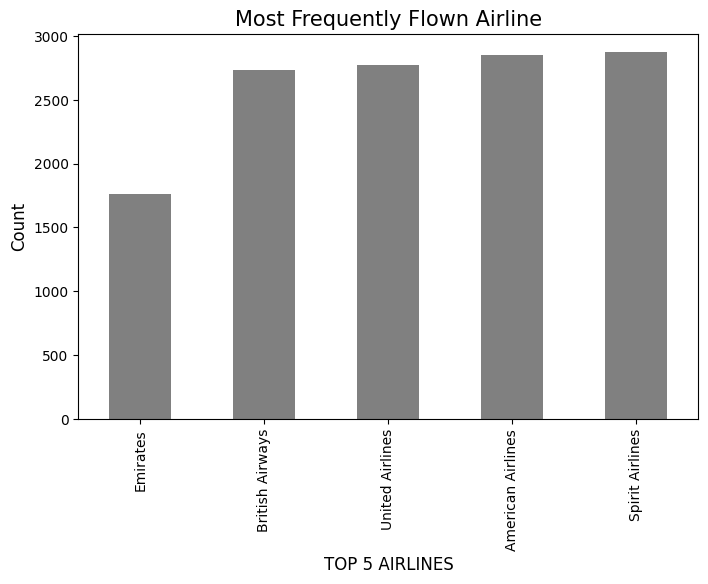

In [146]:
# Visualize the top 5 most frequently flown aircarft types
plt.figure(figsize=(8,5))
top_airline[-5:].plot(kind='bar',color = 'grey')
plt.xlabel('TOP 5 AIRLINES',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Most Frequently Flown Airline',fontsize=15)
plt.show()


**TOP 5 AIRLINES ARE**:

Emirates

British Airways

United Airlines

American Airlines

Spirit Airline

## *Spirit Airline being top airline.*

**Top Rating**

In [147]:
top_rating = df_airline['overall'].value_counts().sort_values()
top_rating

4.0      2398
6.0      2436
5.0      2924
3.0      3741
7.0      4215
2.0      5491
8.0      6705
9.0      7363
10.0     8025
1.0     16103
Name: overall, dtype: int64

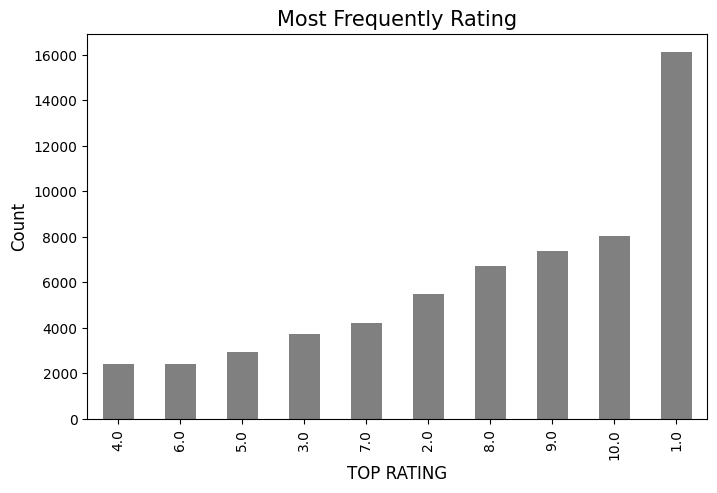

In [148]:
# Visualize the top 5 most frequently flown aircarft types
plt.figure(figsize=(8,5))
top_rating.plot(kind='bar',color = 'grey')
plt.xlabel('TOP RATING',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Most Frequently Rating',fontsize=15)
plt.show()

**Observation**

1.0 is most frequent rating

**Top Aircraft Type**

In [149]:
top_aicraft_type = df_airline['aircraft'].value_counts().sort_values()
top_aicraft_type[-5:]

A330               974
Boeing 737-800    1021
Boeing 777        1101
A380              1109
A320              2130
Name: aircraft, dtype: int64

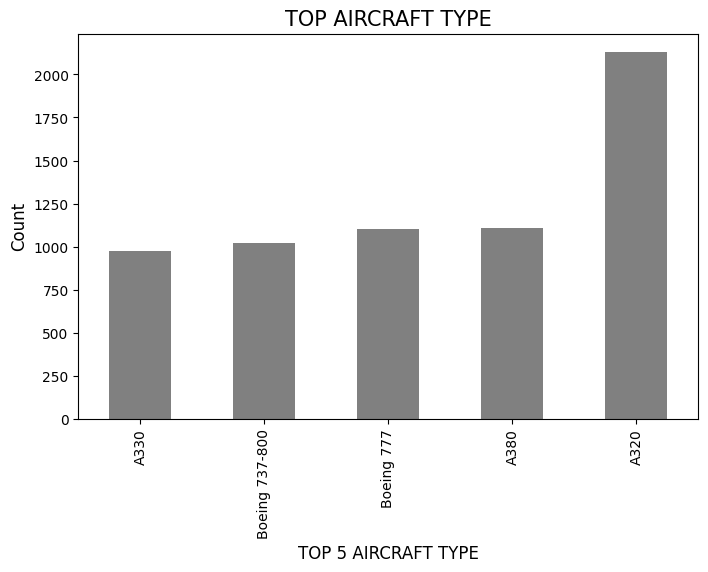

In [150]:
plt.figure(figsize=(8,5))
top_aicraft_type[-5:].plot(kind='bar',color = 'GRAY')
plt.xlabel('TOP 5 AIRCRAFT TYPE',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('TOP AIRCRAFT TYPE',fontsize=15)
plt.show()

**Observation**


TOP AIRCRAFT TYPE IS A320

**Traveller Type Count**

In [151]:
travellertype_count = df_airline['traveller_type'].value_counts().sort_values()
travellertype_count

Business           6764
Family Leisure     7142
Couple Leisure     9699
Solo Leisure      13935
Name: traveller_type, dtype: int64

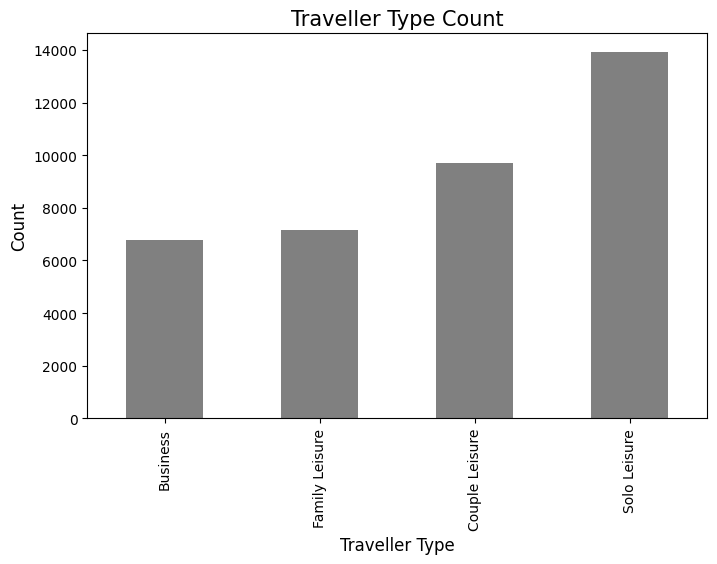

In [152]:
plt.figure(figsize=(8,5))
travellertype_count.plot(kind='bar',color = 'GRAY')
plt.xlabel('Traveller Type',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Traveller Type Count',fontsize=15)
plt.show()

**Observation**

Solo Leisureare the highest traveller type

**Grouping By Cabin Type**

In [153]:
cabin_count = df_airline['cabin'].value_counts().sort_values()
cabin_count

First Class         1532
Premium Economy     2412
Business Class      9590
Economy Class      45171
Name: cabin, dtype: int64

Text(0.5, 1.0, 'Cabin Type Distribution')

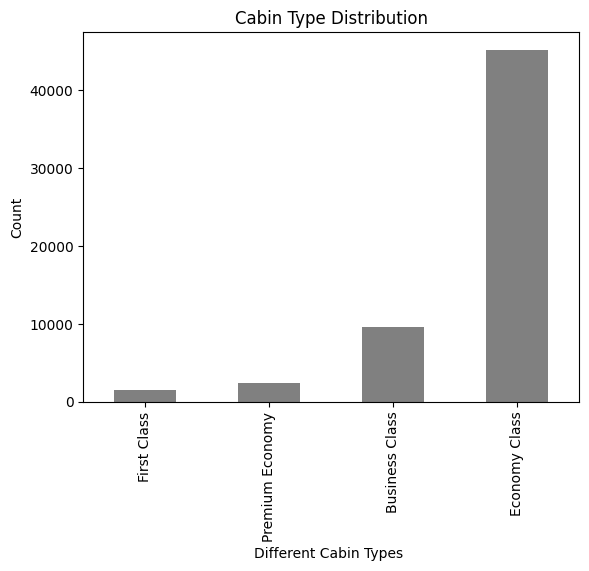

In [154]:
cabin_count.plot(kind = 'bar',color = 'grey')
plt.xlabel("Different Cabin Types ")
plt.ylabel('Count')
plt.title('Cabin Type Distribution')

**ECONOMY CLASS** IS MOST PREFERRED

**Extracting month from date_flown column**

In [155]:
# Change the 'date_flown' column to datetime type
df_airline['date_flown'] = df_airline['date_flown'].apply(lambda x:pd.to_datetime(x))


# Create a column 'travel_month' to identify in which month the passengers travel
df_airline['travel_month'] = df_airline['date_flown'].dt.month

date = df_airline['travel_month'].value_counts().reset_index().sort_values(by='index')

date.replace({1:'Jan',2:"Feb",3:"Mar",4:'Apr',5:'May',6:'June',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})



,index,travel_month
4,Jan,3221
11,Feb,2553
8,Mar,2911
9,Apr,2884
10,May,2638
3,June,3400
0,Jul,3605
1,Aug,3535
5,Sep,3185
6,Oct,3163


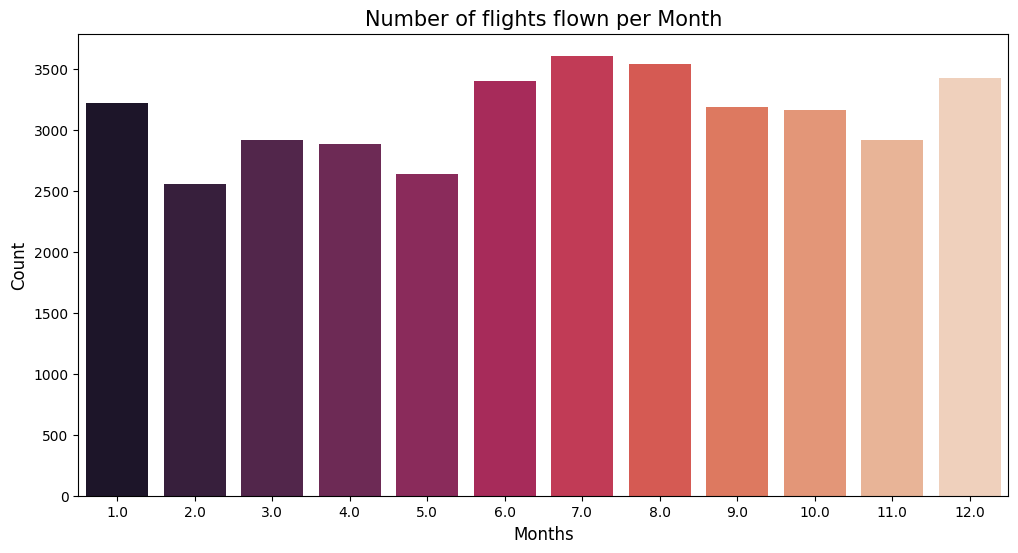

In [156]:
plt.figure(figsize=(12,6))
sns.barplot(x='index',y='travel_month', data= date,palette='rocket')
plt.xlabel('Months',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Number of flights flown per Month',fontsize=15)
plt.show()

**It is evident that :
Most if travel happens in month of July, followed by August ,December,June**

**Most Frequent Route Count**

In [157]:
route_count = df_airline['route'].value_counts().sort_values()
route_count[-5:]

Guangzhou to New York    26
LHR to BKK               27
Vancouver to Toronto     28
LHR to JFK               30
BKK to LHR               31
Name: route, dtype: int64

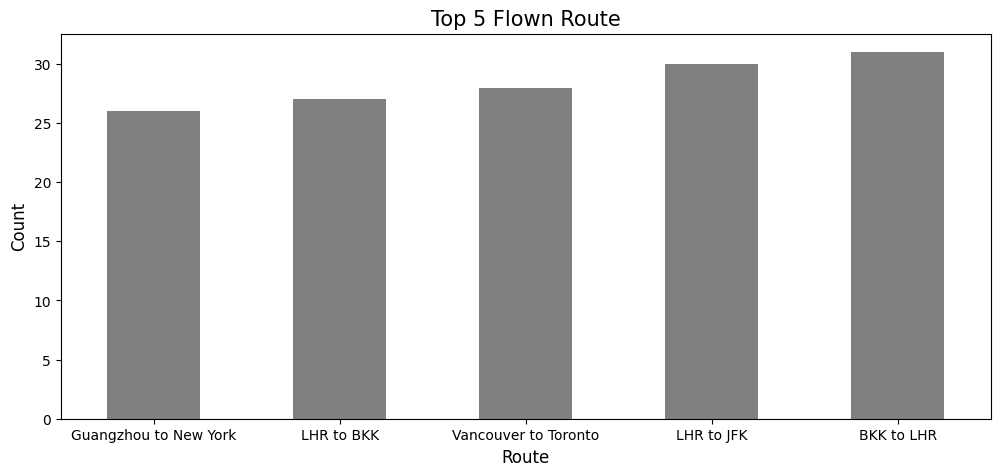

In [158]:
plt.figure(figsize=(12,5))
route_count[-5:].plot(kind='bar',color = 'grey')
plt.xlabel('Route',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Top 5 Flown Route',fontsize=15)
plt.xticks(rotation= 'horizontal')
plt.show()


**Stack plot for better graphical conclusion**

In [159]:
from numpy.ma.core import var

#Function for Stacked plot of rating features
def stacked_plot(var):
  ''' Stacked plot of rating features'''
  x = df_airline.groupby([df_airline['overall']])
  x[var].value_counts().unstack().plot(kind= 'bar',stacked = True, figsize=(12,6))

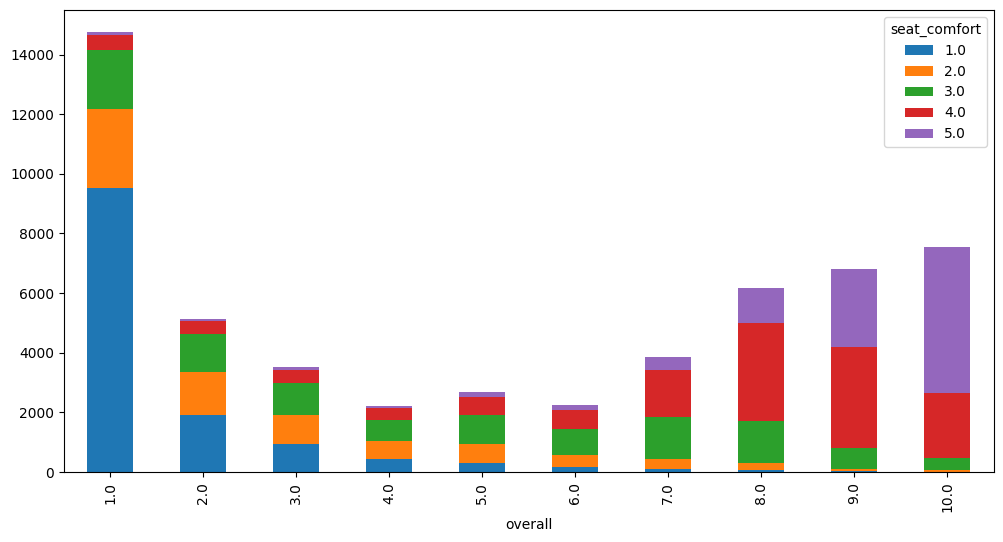

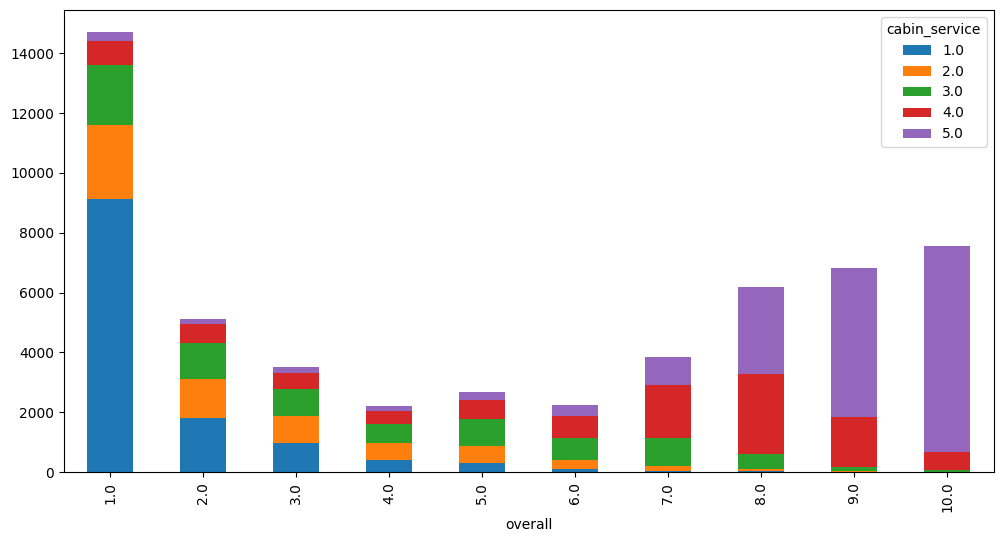

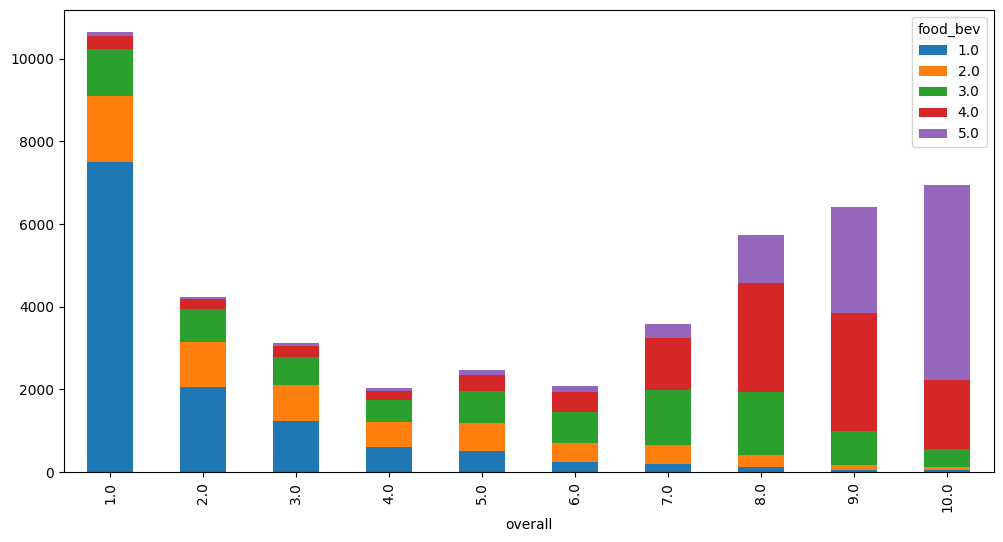

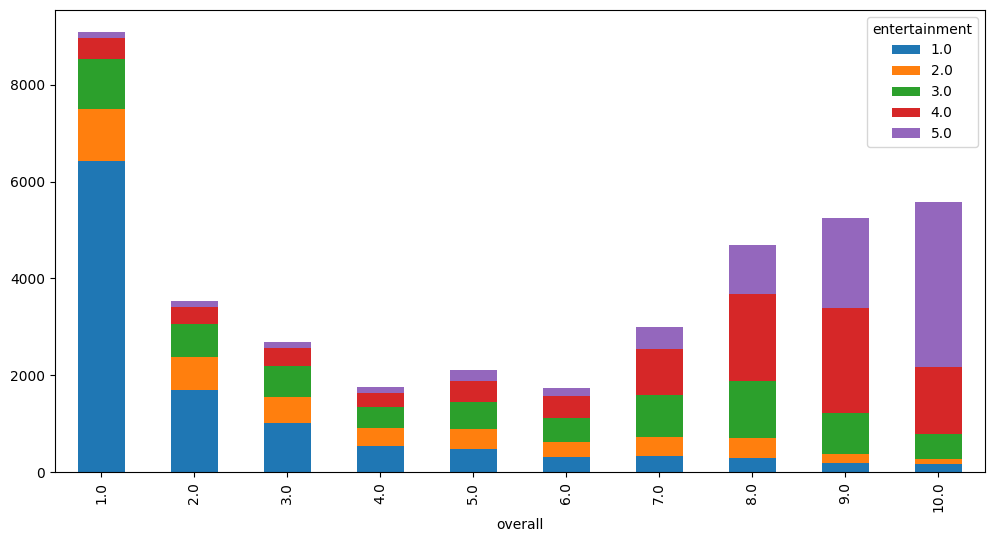

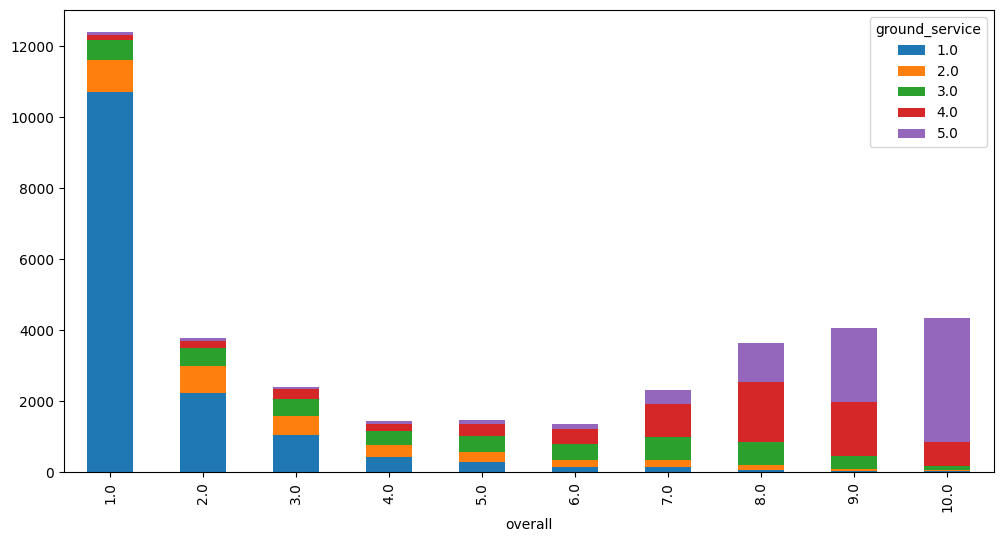

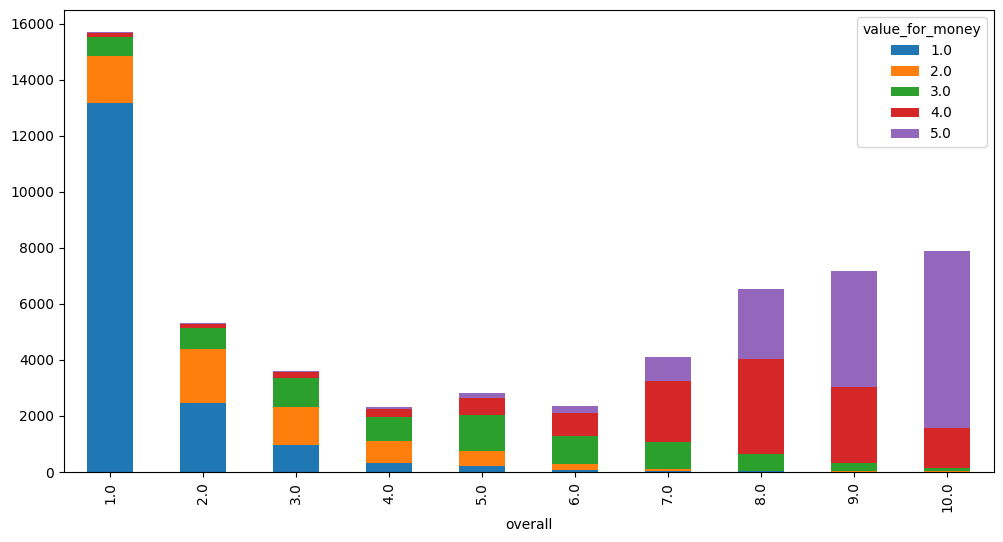

In [160]:
ratings = ['seat_comfort','cabin_service','food_bev','entertainment', 'ground_service', 'value_for_money']

# Get Stacked plot of rating features.
for var in ratings:
  stacked_plot(var)

**Frequency Distribution of all columns**

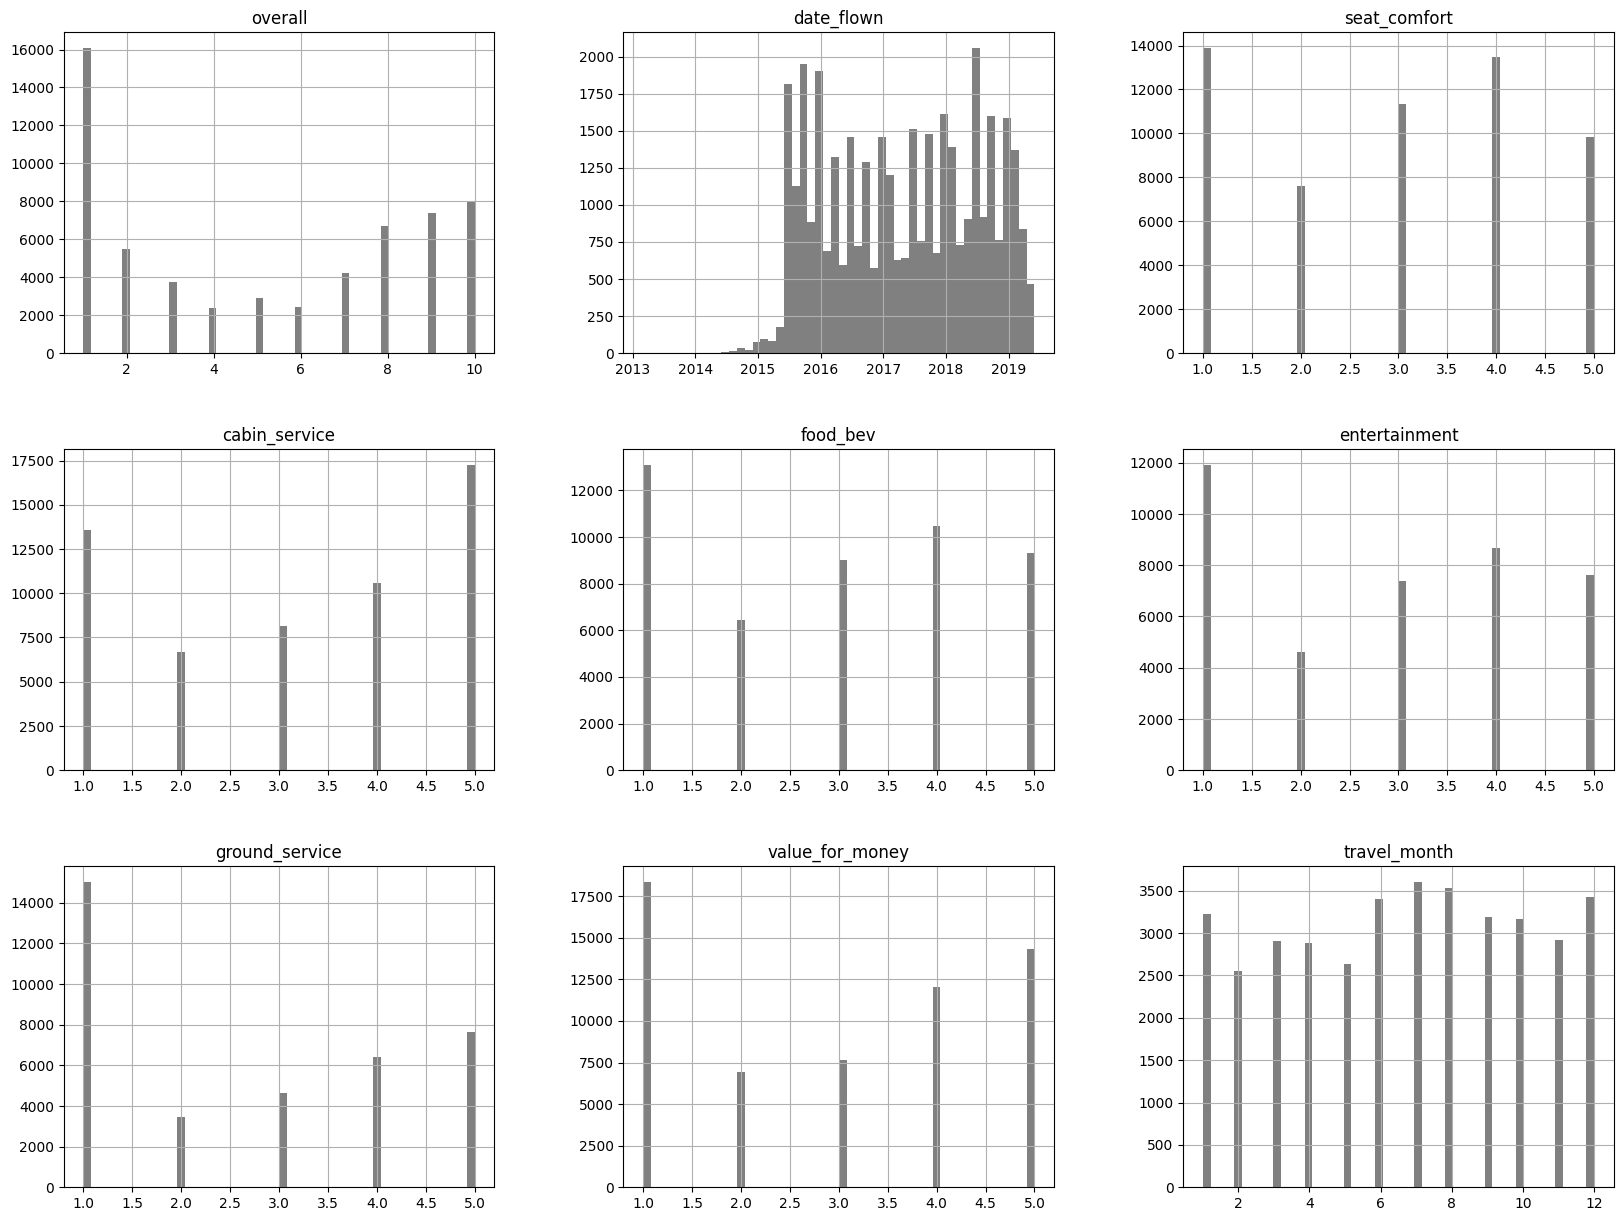

In [161]:
#frequency distribution using histogram
df_airline.hist(bins=50, figsize=(20,15),color = 'GREY')
plt.show()



**SOME CONCLUSIONS**

* 1.0 is highest rating in case of seat_comfort, food_bev ,entertainment, ground_service and value_for_money
* 5.0 is highest rating in cabin_service
* July is month with highest travel count


**Treating Null Values**

**Dropping unnecessary  columns**

In [162]:
df_airline.head(2)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,travel_month
0,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01,4.0,5.0,4.0,4.0,2.0,4.0,yes,5.0
1,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01,4.0,1.0,1.0,1.0,1.0,1.0,no,5.0


In [163]:
df_airline.isna().sum().sort_values()

airline                0
author                 0
review_date            0
customer_review        0
recommended         1422
overall             1782
value_for_money     1856
cabin               2478
cabin_service       4943
seat_comfort        4972
food_bev           12842
entertainment      20953
traveller_type     23643
route              23670
date_flown         23749
travel_month       23749
ground_service     24014
aircraft           42695
dtype: int64

Dropping certain columns like:

author : as it not required for prediction

review_date :for the same reason

customer_review : as this can be realred to overall rating

route : as it is not required for prediction

date_flown : this variable won't help us in predicting if someone will recommend or not  

aircraft :because predicting someone will recommend an airline or not does not depenend pn aircrat type rather on service,seat_comfort

In [ ]:
# droping the columns from data which are not for our use
df_airline= df_airline.drop(['author','review_date','route','date_flown','customer_review','aircraft','travel_month'],axis = 1)
df_airline.head(2)

In [165]:
df_airline.isna().sum()

airline                0
overall             1782
traveller_type     23643
cabin               2478
seat_comfort        4972
cabin_service       4943
food_bev           12842
entertainment      20953
ground_service     24014
value_for_money     1856
recommended         1422
dtype: int64

Now we shall handle these null values

 * coulmns like overall ,seat_comfort,cabin_service,value_for_money have less null values hence they shall be  imputed with q1 and since all of them are rating we shall treat them in one way

 * columns like food_bev,entertainment,ground_service have high null values shall be imputed with median as these are the ratings

 * airline has zero null value so shall stay untouched

 * traveller type has many null valuea so it shall be imputed by forward fill method

* cabin shall be treated usingn mode

* recommended  we shall drop null value rows as , this is our dependent variable



In [166]:
#Splitting the Numeric column
q1_treatment = ['overall','seat_comfort','cabin_service','value_for_money']
median_treatment = ['food_bev','entertainment','ground_service']

In [167]:
#Imputation technique using Quantile-1 value
def impute_by_q1_values(df,column):
  Q1=np.percentile(np.sort(df[column].dropna()),25)
  df[column].fillna(Q1,inplace=True)


In [168]:
#Looping the null value column
for col in q1_treatment:
  impute_by_q1_values(df_airline,col)


In [169]:
def median_imputation(df,column):
  df[column].fillna(df[column].median(),inplace=True)

In [170]:
#Looping the null value column
for col in median_treatment:
  median_imputation(df_airline,col)


In [171]:
df_airline['traveller_type'].fillna(method="ffill",inplace=True)

In [172]:
df_airline['cabin'].fillna(df_airline['cabin'].mode().values[0],inplace=True)

In [173]:
df_airline.dropna(subset=['recommended'],inplace=True)
#we know recommeneded is our dependent variable so we shall convert it into numerical data type rather than categorical
df_airline['recommended'].replace({'yes':1,'no':0},inplace=True)

In [174]:
df_airline.isna().sum()

airline            0
overall            0
traveller_type     0
cabin              0
seat_comfort       0
cabin_service      0
food_bev           0
entertainment      0
ground_service     0
value_for_money    0
recommended        0
dtype: int64

since there are null values we shall start further encoding our dataset

In [175]:
df_airline.head()

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,1
1,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,0
2,Turkish Airlines,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,0
3,Turkish Airlines,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,1
4,Turkish Airlines,1.0,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,0


<ipython-input-176-0f537cbb240e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_airline.corr(), annot=True)


<Axes: >

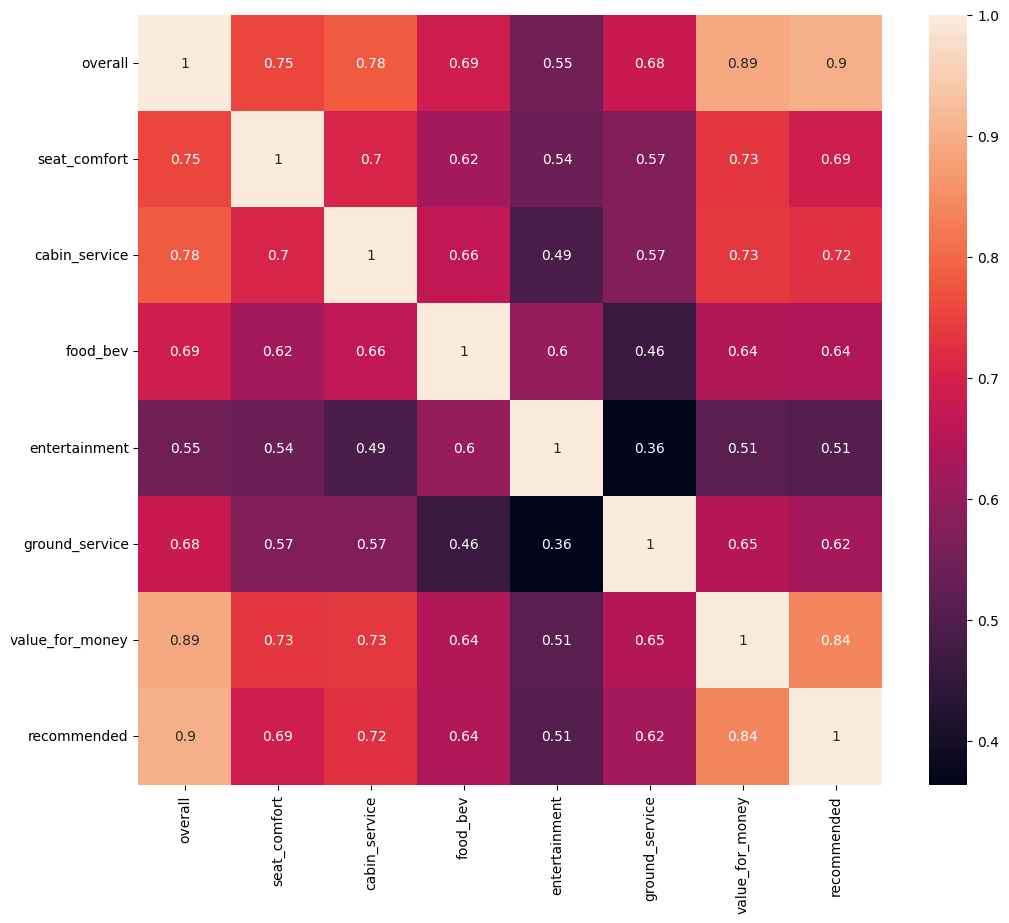

In [176]:
#we have almost treated our dataset
#we shall noe find how are these dataset variable reated to each other
plt.figure(figsize=(12,10))
sns.heatmap(df_airline.corr(), annot=True)


OBSERVATIONS
* people recommend if value for money is there as these two are highly correlated

* seat_comfort and cabin_service are too highly realted to value_for_money



In [177]:
#Creating a function to remove multicollinear
def calc_vif(X):

   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

   return(vif)


In [178]:
calc_vif(df_airline[[i for i in df_airline.describe().columns if i not in ['recommended']]])

,variables,VIF
0,overall,15.627316
1,seat_comfort,14.168530
2,cabin_service,14.654505
3,food_bev,13.319991
4,entertainment,9.808036
5,ground_service,9.164341
6,value_for_money,21.802117


In [179]:
# as we can see from heatmap and VIF overall is highly co-related so we shall drop this column
df_airline.drop(['overall'],axis = 1,inplace = True)


In [180]:
#similarly airline column does not contibute majorly to recommendation so we shall drop this column too
df_airline.drop(['airline'], axis = 1,inplace = True)

In [181]:
df_airline.shape

(59761, 9)

**Separating our dataset**

In [182]:
#separating the dependent and independent variables
y = df_airline['recommended']
x = df_airline.drop(columns = 'recommended')


x.columns

Index(['traveller_type', 'cabin', 'seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money'],
      dtype='object')

In [183]:
x = pd.get_dummies(x)

In [184]:
x.shape

(59761, 14)

**Splitting data into train and test**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 42)

#shape of x_train and x_test data
print(x_train.shape)
print(x_test.shape)


In [186]:

#shape of y_train and y_test data
print(y_train.shape)
print(y_test.shape)

(47808,)
(11953,)


**Model-1:Implementing Logistic Regression**

In [ ]:
#logistic regression fitting
log_reg = LogisticRegression(fit_intercept=True, max_iter=10000)
log_reg.fit(x_train, y_train)


In [188]:
log_reg.coef_


array([[ 0.29470524,  0.54964494,  0.43522642,  0.24880929,  0.72092498,
         1.63381309,  0.15000711, -0.04985052, -0.15934752,  0.06655806,
         0.14922398, -0.06516326,  0.11367346, -0.19036704]])

In [189]:
log_reg.intercept_

array([-11.84300155])

In [190]:
log_reg.score(x_test,y_test)

0.9324019074709278

In [191]:
y_pred = log_reg.predict(x_test)

In [192]:
#report of logistic regression
report_lR = classification_report(y_test, y_pred)
print(report_lR)


              precision    recall  f1-score   support

           0       0.94      0.93      0.93      6225
           1       0.92      0.94      0.93      5728

    accuracy                           0.93     11953
   macro avg       0.93      0.93      0.93     11953
weighted avg       0.93      0.93      0.93     11953



93% accuracy with Logistic Regression

<Axes: >

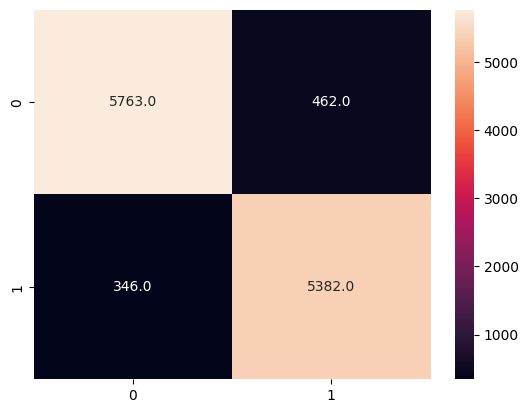

In [193]:
#cofusion matrix of logistic regression
confuse_matrix_lr = confusion_matrix( y_test,y_pred)
#plooting confusion matrix
sns.heatmap(confuse_matrix_lr, annot=True, fmt = ".1f")

**Implementing Cross-validated Logistic Regression**

In [194]:
logistic = LogisticRegression()

In [195]:
from sklearn.model_selection import cross_val_score

In [196]:
scores = cross_val_score(log_reg, x_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)


Cross-Validation Accuracy Scores [0.9405982  0.94415394 0.93766994 0.94122569 0.93913407 0.93474169
 0.94080736 0.94143485 0.93284519 0.93702929]


In [197]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.9328451882845188, 0.9389640216372515, 0.9441539426898139)

**Model-2:Fitting Decision Tree Classifer**

In [ ]:
#Initializing Decision Tree Model object
tree_classify=DecisionTreeClassifier()
#Taining a model with x and y
tree_classify.fit(x_train,y_train)

In [199]:
print("Training Accuracy of Decision Tree Model is",tree_classify.score(x_train,y_train))
print("Testing Accuracy of Decision Tree Model is",tree_classify.score(x_test,y_test))

Training Accuracy of Decision Tree Model is 0.9745440093708166
Testing Accuracy of Decision Tree Model is 0.9168409604283444


In [200]:
y_pred = tree_classify.predict(x_test)

In [201]:
#report of decision tree
report_dec_tree = classification_report(y_test, y_pred)
print(report_dec_tree)



              precision    recall  f1-score   support

           0       0.92      0.92      0.92      6225
           1       0.92      0.91      0.91      5728

    accuracy                           0.92     11953
   macro avg       0.92      0.92      0.92     11953
weighted avg       0.92      0.92      0.92     11953



**Hyperparameter Tuning For Decision Tree**

In [202]:
#setting the parameters and scoring metric
parameters = {"criterion":["gini","entropy"],"max_depth":[5,7],"min_samples_split":[5,7],"min_samples_leaf":[2,3]}
scoring_=['f1','recall','precision','accuracy']


In [203]:

#performing hyperparameter tuning using gridsearchcv

#setting an estimator,and crossvalidation
tree_cv = GridSearchCV(estimator=tree_classify, param_grid=parameters, scoring=scoring_, cv=5,refit='accuracy')

#Fitting x and y to gridsearchcv model using an estimator Decision tree classifier
tree_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 7],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [5, 7]},
             refit='accuracy',
             scoring=['f1', 'recall', 'precision', 'accuracy'])

In [204]:
#calling an best params
tree_cv.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 5}

93% accuracy of Decision Tree with the help of hypermatring tunning.

**Model-3:Fitting Random Forest**

In [205]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train,y_train)


RandomForestClassifier()

In [206]:
random_forest.score(x_test,y_test)

0.9283025181962687

In [207]:
#report of random forest
report_ran_forest = classification_report(y_test, y_pred)
print(report_ran_forest)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      6225
           1       0.92      0.91      0.91      5728

    accuracy                           0.92     11953
   macro avg       0.92      0.92      0.92     11953
weighted avg       0.92      0.92      0.92     11953



92% accuracy with Random Forest

**Implementing Cross-validated Random Forest**

In [208]:

random_forest_gridcv = GridSearchCV(estimator=random_forest,
                       param_grid = parameters,
                       cv = 5, verbose=2)

In [209]:

random_forest_gridcv.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.6s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7; total time=   1.9s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7; total time=   1.8s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7; total time=   1.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7; total time=   1.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2,

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 7],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [5, 7]},
             verbose=2)

In [210]:
random_forest_gridcv.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 5}

**Model-4:K-Nearest Neighbour**

In [211]:

k_neighbor = KNeighborsClassifier()
k_neighbor.fit(x_train, y_train)


KNeighborsClassifier()

In [212]:
y_pred = k_neighbor.predict(x_test)

In [213]:
# Compute accuracy on the training set
train_accuracy = k_neighbor.score(x_train, y_train)
print(train_accuracy)
# Compute accuracy on the test set
test_accuracy = k_neighbor.score(x_test, y_test)
print(test_accuracy)

0.9493390227576974
0.9293901112691375


In [214]:
#confusion matrix of k_neighbor
confuse_matrix_k_neighbor  = confusion_matrix(y_test,y_pred)
confuse_matrix_k_neighbor


array([[5815,  410],
       [ 434, 5294]])

In [215]:
# Area under ROC curve
roc_auc_score(y_test,y_pred)

0.9291841948800791

**Model-5:Support Vector Machine**

In [216]:
support_vector = SVC(kernel='linear')
support_vector.fit(x_train, y_train)

SVC(kernel='linear')

In [217]:
# score for support vector machine
support_vector.score(x_test, y_test)

0.9318162804316907

In [218]:
y_pred = support_vector.predict(x_test)

In [219]:
#confusion matrix
support_vector_con_mat = confusion_matrix( y_test,y_pred)
support_vector_con_mat

array([[5747,  478],
       [ 337, 5391]])

**Model-6:Naïve Bayes Classifier**

In [220]:
#Implimanting naive bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

GaussianNB()

In [221]:
#score for naive bayes
naive_bayes.score(x_train,y_train)

0.9177543507362784

In [222]:
# making predictions on the testing set
y_pred = naive_bayes.predict(x_test)

In [223]:
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 91.0901029030369


**Accuracy Metrics for All Fitted Model**

In [224]:
#Creating a function to return all Models Accuracy Score

def accuracy_of_each_model(model,X_train,X_test):

  #predicting a train datas
  y_train_preds=model.predict(X_train)

  #predicting a test datas
  y_test_preds=model.predict(X_test)

  #storing all training scores
  train_scores=[]

  #storing all test scores
  test_scores=[]
  metrics=['Accuracy_Score','Precsion_Score','Recall_Score','Roc_Auc_Score']

  # Get the accuracy scores
  train_accuracy_score = accuracy_score(y_train,y_train_preds)
  test_accuracy_score = accuracy_score(y_test,y_test_preds)

  train_scores.append(train_accuracy_score)
  test_scores.append(test_accuracy_score)

  # Get the precision scores
  train_precision_score = precision_score(y_train,y_train_preds)
  test_precision_score = precision_score(y_test,y_test_preds)

  train_scores.append(train_precision_score)
  test_scores.append(test_precision_score)

  # Get the recall scores
  train_recall_score =recall_score(y_train,y_train_preds)
  test_recall_score =recall_score(y_test,y_test_preds)


  train_scores.append(train_recall_score)
  test_scores.append(test_recall_score)

  # Get the roc_auc scores
  train_roc_auc_score=roc_auc_score(y_train,y_train_preds)
  test_roc_auc_score =roc_auc_score(y_test,y_test_preds)

  train_scores.append(train_roc_auc_score)
  test_scores.append(test_roc_auc_score)

  return train_scores,test_scores,metrics

In [225]:
models=[log_reg,tree_cv,random_forest,k_neighbor,support_vector,naive_bayes]
name=['Logistic Regression Model','Decision Tree Model After Hyperparameter Tuning','Random Forest Model After Hyperparameter Tuning','k_neighbor','support vector','naive bayes']


In [226]:
for model_ in range(len(models)):
  train_score_,test_score_,metrics_=accuracy_of_each_model(models[model_],x_train,x_test)
  print("-*-*-"*3+f"{name[model_]}"+"-*-*-"*4)
  print("")
  print(pd.DataFrame(data={'Metrics':metrics_,'Train_Score':train_score_,'Test_Score':test_score_}))
  print("")


-*-*--*-*--*-*-Logistic Regression Model-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.938985    0.932402
1  Precsion_Score     0.928165    0.920945
2    Recall_Score     0.945003    0.939595
3   Roc_Auc_Score     0.939259    0.932689

-*-*--*-*--*-*-Decision Tree Model After Hyperparameter Tuning-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.940972    0.932904
1  Precsion_Score     0.934318    0.926272
2    Recall_Score     0.942280    0.934358
3   Roc_Auc_Score     0.941032    0.932962

-*-*--*-*--*-*-Random Forest Model After Hyperparameter Tuning-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.974523    0.928303
1  Precsion_Score     0.970397    0.926010
2    Recall_Score     0.976279    0.924232
3   Roc_Auc_Score     0.974603    0.928140

-*-*--*-*--*-*-k_neighbor-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.949339  

**Conclusion**

The Models used for this Classsification problem are

* Logistic Regression Model
* Decision Tree Model
* Random Forest Model
* K-Nearest Neighbor Model
* Support Vector Machine Model 6.Naive Bayes

We performed Hyperparameter tuning using Gridsearch CV method for Decision Tree Model, Random Forest Model , K-Nearest Neighbor ,Support Vector Machine and Naive Bayes. To increase accuracy and avoid Overfitting Criteria, this is done. After that, we finalized the Gradient Boosting model by fine-tuning the hyperparameters.

Based on the knowledge of the business and the problem usecase. The Classification metrics of Recall is given first priority , Accuray is given second priority , and ROC AUC is given third priority.

We have built classifier models using 6 different types of classifiers and all these are able to give accuracy of more than 90%.

Recall score of Support Vector Machine is highest.


The most important feature are overall rating and Value for money that contribute to a model's prediction whether a passenger will recommened a particular airline to his/her friends.

The classifier models developed can be used to predict passenger referral as it will give airlines ability to identify impactful passengers who can help in bringing more revenues.

As a result, in order to increase their business or grow, our client must provide excellent cabin service, ground service, food beverage entertainment, and seat comfort.
